In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
FILES_FOLDER = {
    "clean_data": [
        "clean_data/building.csv",
        "clean_data/meters.csv",
        "clean_data/weather.csv",
        "clean_data/merged_timestam1.feather",
        #"data_for_data_challenge/X_test_data.feather", # The dataset test will be released one hour before the end of the Data Challenge
    ]
}


def load_data(folder, data_dir, dict_files=FILES_FOLDER):
    files = dict_files[folder]
    dataframes = []
    print(":: Start loading data")
    for name_file in tqdm(files):
        if name_file.endswith('.feather'):
            dataframe = pd.read_feather(os.path.join(data_dir, name_file))
            dataframes.append(dataframe)
        elif name_file.endswith('.csv'):
            dataframe = pd.read_csv(os.path.join(data_dir, name_file))
            dataframes.append(dataframe)
    return dataframes


building, meters, weather, merged = load_data("clean_data", "./")



:: Start loading data


100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


In [3]:
merged

,timestamp,building_id,meter,meter_reading,site_id,primary_use_class,sub_primary_use,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,198,0,197.8700,2.0,1.0,1.0,163959.0,15.6,-5.6,1015.5,270.0,3.6
1,2016-01-01 00:00:00,239,3,67.4063,2.0,0.0,11.0,106440.0,15.6,-5.6,1015.5,270.0,3.6
2,2016-01-01 00:00:00,276,0,115.7400,2.0,1.0,1.0,70837.0,15.6,-5.6,1015.5,270.0,3.6
3,2016-01-01 00:00:00,234,0,63.0700,2.0,4.0,10.0,179167.0,15.6,-5.6,1015.5,270.0,3.6
4,2016-01-01 00:00:00,191,0,54.8500,2.0,4.0,10.0,78268.0,15.6,-5.6,1015.5,270.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872589,2017-06-30 23:00:00,46,0,35.4351,0.0,3.0,3.0,9045.0,25.6,22.8,1018.5,0.0,0.0
872590,2017-06-30 23:00:00,1031,3,5.0112,11.0,4.0,56.0,93206.0,23.1,20.1,1008.0,180.0,3.6
872591,2017-06-30 23:00:00,658,0,0.0003,5.0,5.0,46.0,31075.0,14.0,12.0,NaN,310.0,3.1
872592,2017-06-30 23:00:00,739,0,0.0074,5.0,4.0,43.0,137046.0,14.0,12.0,NaN,310.0,3.1


Analyse de la distrib des meter_reading pour chaque building au sein d'une subclass:
on remarque une tendance et des intrus sur la forme de la répartition
on peut donc penser à classer les buildings par "formes" de densité et non par subclass
à voir avec les noms des subclass demain.

In [ ]:
for val in merged.loc[merged['sub_primary_use']==1]['building_id'].unique():
    sns.violinplot(merged.loc[merged['sub_primary_use']==1].loc[merged['building_id']==val], x = 'meter_reading')
    plt.show()

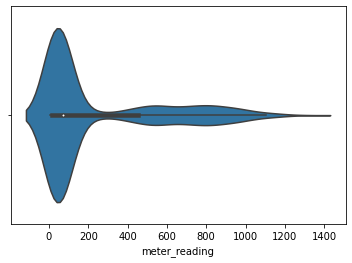

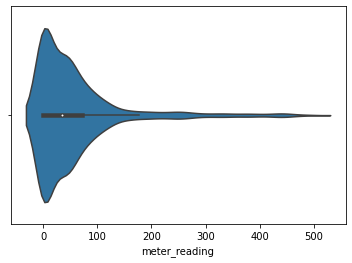

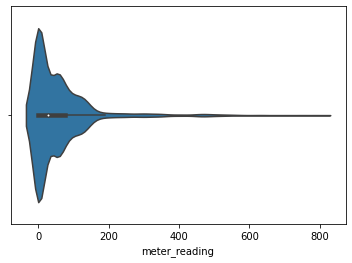

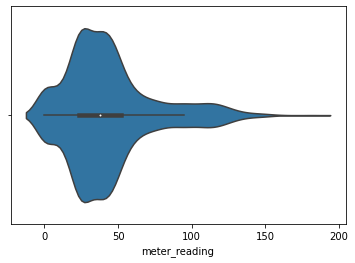

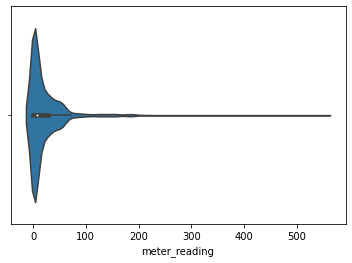

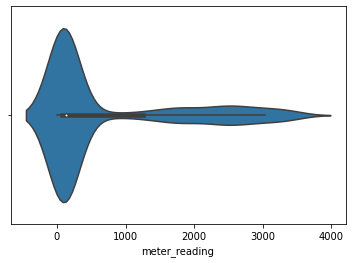

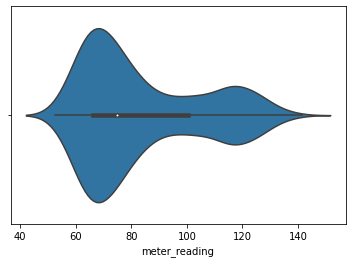

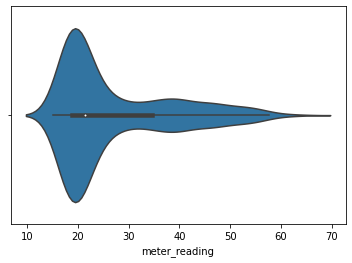

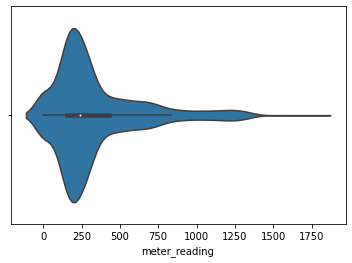

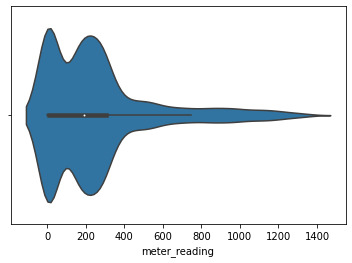

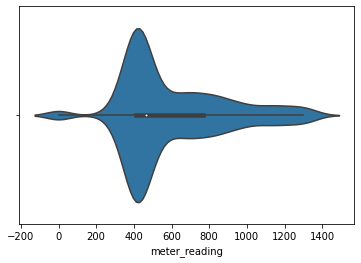

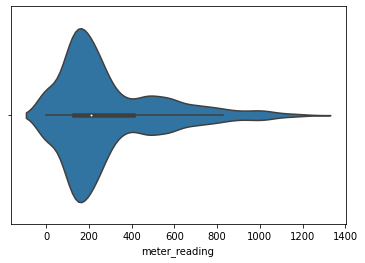

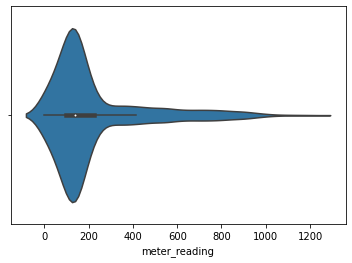

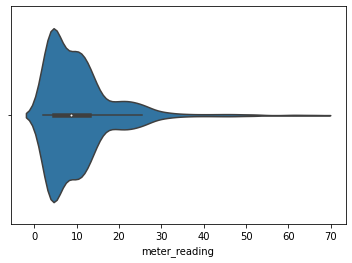

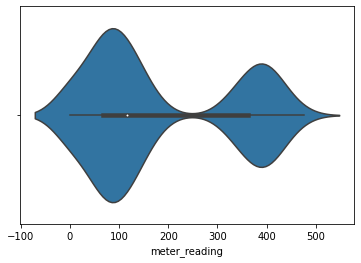

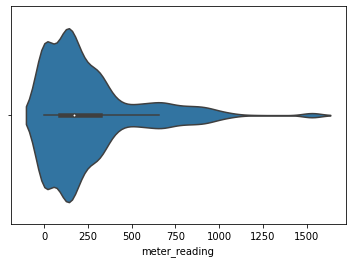

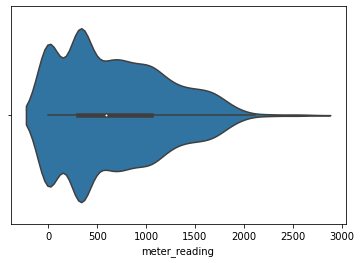

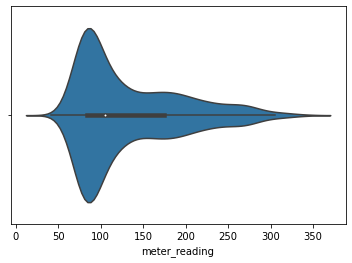

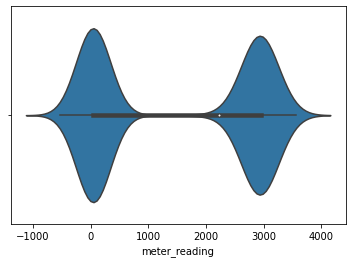

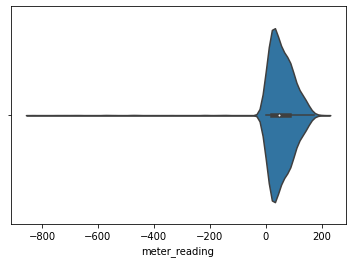

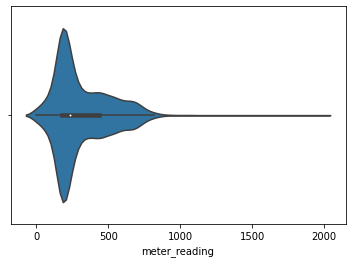

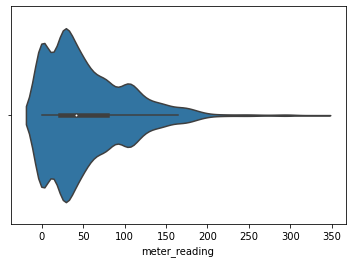

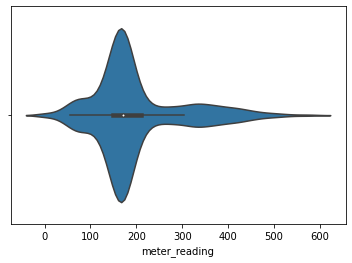

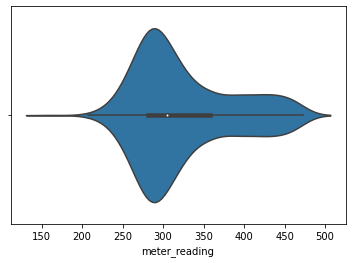

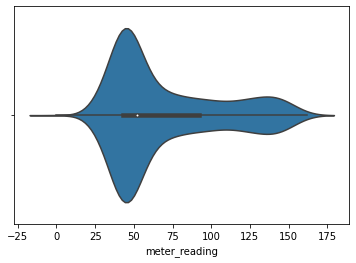

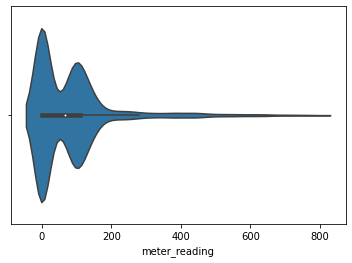

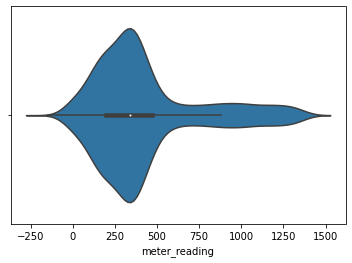

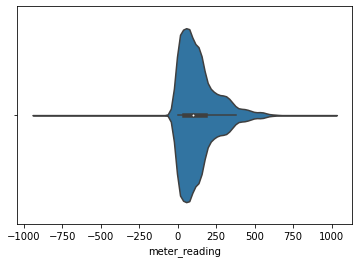

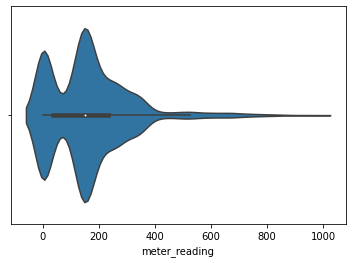

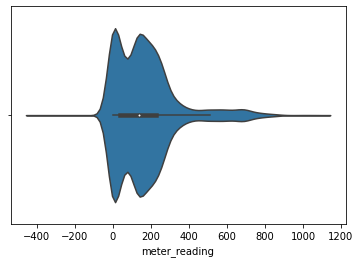

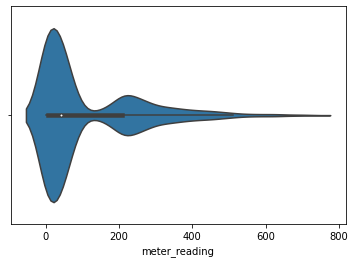

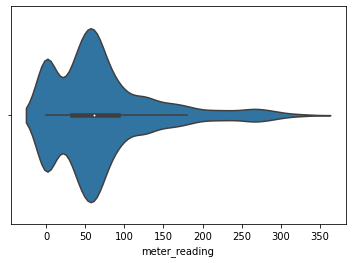

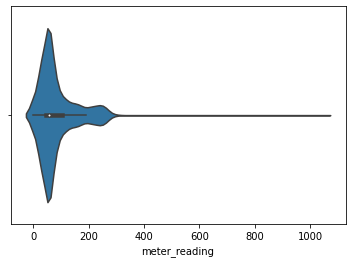

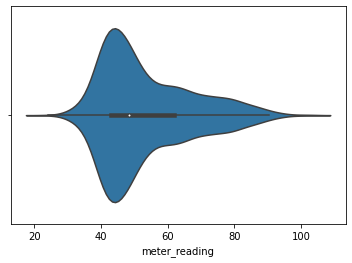

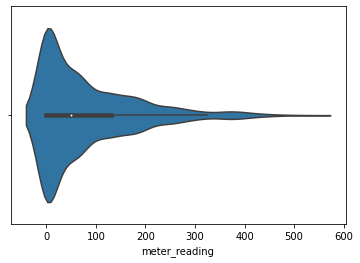

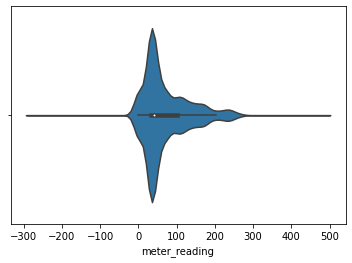

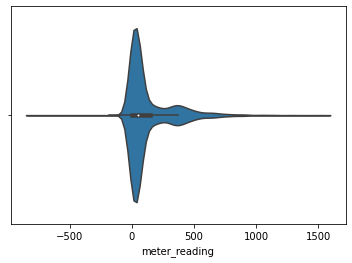

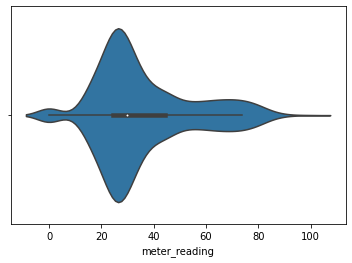

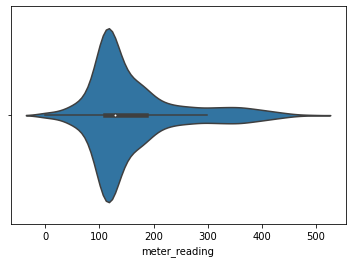

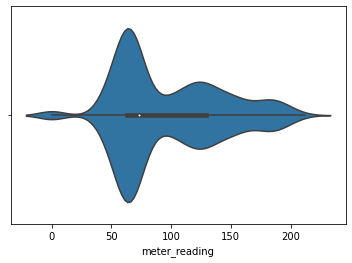

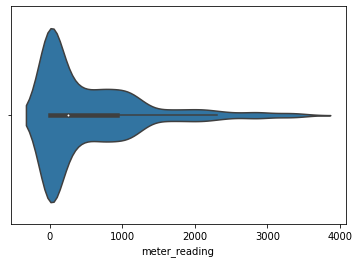

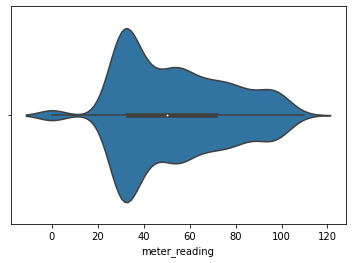

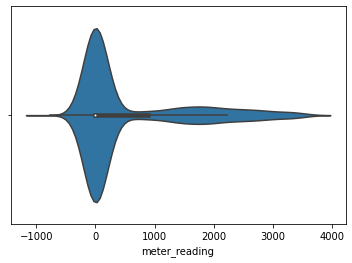

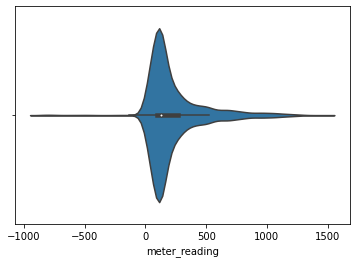

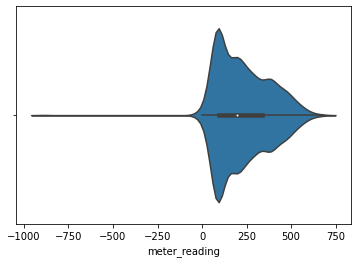

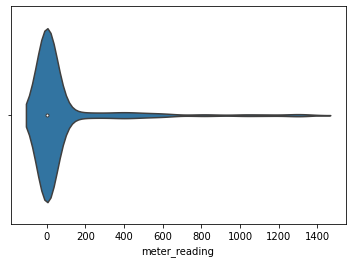

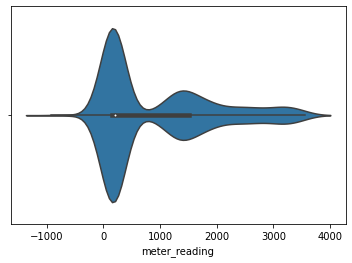

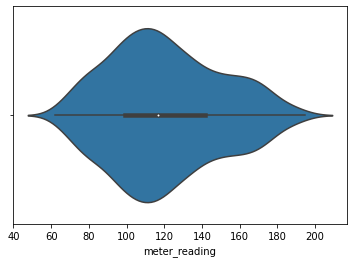

In [6]:
for val in merged.loc[merged['sub_primary_use']==10]['building_id'].unique():
    sns.violinplot(merged.loc[merged['sub_primary_use']==10].loc[merged['building_id']==val], x = 'meter_reading',scale='count')
    plt.show()